# Phishing-Website-Detection

This repository contains code for predicting phishing websites in a webpage phishing dataset using various machine learning models. We explored three different models: Random Forest, XGBoost, and Support Vector Machine (SVM).

#### Methodology:
1. Data Cleaning and Preprocessing
2. Model Development
3. Model Saving

#### Dataset Used:
The dataset used for this project contains webpage phishing detection obtained from Kaggle

#### Usage:
To replicate the experiments or apply the trained model:
1. Obtain a similar dataset.
2. Follow the provided Jupyter notebooks or Python scripts for data preprocessing, model training.
3. Adjust parameters or algorithms as needed based on the specifics of your dataset.
4. Save the trained model using the provided code snippet with `pickle`.
5. Utilize the saved model for making predictions on new data.

#### Dependencies:
- Python 3
- Libraries: NumPy, pandas, scikit-learn, scipy, pickle


# Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from scipy.stats import randint, uniform
import pickle
from xgboost import XGBClassifier

# Load Dataset

In [145]:
df = pd.read_csv('dataset_phishing.csv')

# Data Cleaning and Preprocessing

In [147]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [149]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [150]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [ ]:

mapping = {'legitimate':0, 'phishing':1}

df['status'] = df['status'].map(mapping)

In [152]:
df['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

In [153]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


In [154]:
target_corr = corr_matrix['status']
target_corr

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [ ]:

threshold=0.1
relevant_features = target_corr[abs(target_corr)>threshold].index.tolist()
relevant_features

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_slash',
 'nb_semicolumn',
 'nb_www',
 'nb_com',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'shortening_service',
 'length_words_raw',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extRedirection',
 'external_favicon',
 'links_in_tags',
 'ratio_intMedia',
 'ratio_extMedia',
 'safe_anchor',
 'empty_title',
 'domain_in_title',
 'domain_with_copyright',
 'domain_registration_length',
 'domain_age',
 'dns_record',
 'google_index',
 'page_rank',
 'status']

In [ ]:


X = df[relevant_features]
X = X.drop('status', axis=1)
y = df['status']

In [157]:
X.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_slash,...,ratio_extMedia,safe_anchor,empty_title,domain_in_title,domain_with_copyright,domain_registration_length,domain_age,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,3,...,0.000000,0.0,0,0,1,45,-1,1,1,4
1,77,23,1,1,0,0,0,0,0,5,...,20.000000,100.0,0,1,0,77,5767,0,1,2
2,126,50,1,4,1,0,1,2,3,5,...,0.000000,100.0,0,1,0,14,4004,0,1,0
3,18,11,0,2,0,0,0,0,0,2,...,3.571429,62.5,0,1,0,62,-1,0,0,3
4,55,15,0,2,2,0,0,0,0,5,...,100.000000,0.0,0,0,1,224,8175,0,0,6


In [158]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64

# Model Development

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [161]:
scaler = StandardScaler()

In [162]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:

joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

## Random Forest

In [165]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [166]:
rf_predict = rf.predict(X_test_scaled)

In [167]:
accuracy = accuracy_score(y_test,rf_predict)
print("Accuracy:{}%".format(round(accuracy *100), 1))

Accuracy:96%


In [168]:
rf_Accuracy_Score = accuracy_score(y_test,rf_predict)
rf_JaccardIndex = jaccard_score(y_test,rf_predict)
rf_F1_Score = f1_score(y_test,rf_predict)
rf_Log_Loss = log_loss(y_test,rf_predict)

In [169]:
print(f"Accuracy: {rf_Accuracy_Score}")
print(f"Jaccard Index: {rf_JaccardIndex}")
print(f"F1 Score: {rf_F1_Score}")
print(f"Log Loss: {rf_Log_Loss}")

Accuracy: 0.963254593175853
Jaccard Index: 0.9275862068965517
F1 Score: 0.962432915921288
Log Loss: 1.3244387072116541


In [170]:
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_conf_matrix

array([[1126,   31],
       [  53, 1076]], dtype=int64)

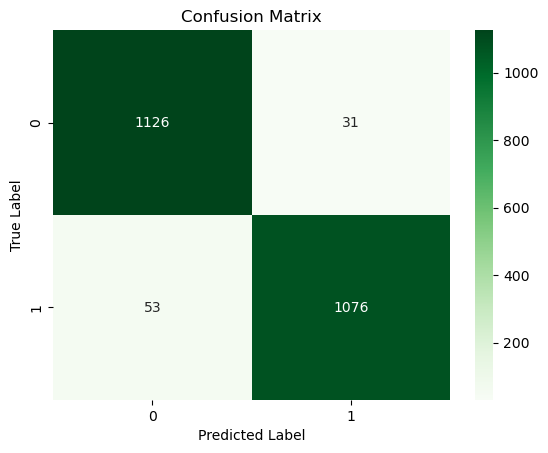

In [171]:
sns.heatmap(rf_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [172]:
rf_report = classification_report(y_test,rf_predict)
print(rf_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1157
           1       0.97      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



## SVM

In [174]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

SVC()

In [175]:
svm_predict = svm.predict(X_test_scaled)

In [176]:
accuracy = accuracy_score(y_test,svm_predict)
print("Accuracy:{}%".format(round(accuracy *100), 1))

Accuracy:97%


In [177]:
svm_Accuracy_Score = accuracy_score(y_test,svm_predict)
svm_JaccardIndex = jaccard_score(y_test,svm_predict)
svm_F1_Score = f1_score(y_test,svm_predict)
svm_Log_Loss = log_loss(y_test,svm_predict)

In [178]:
print(f"Accuracy: {svm_Accuracy_Score}")
print(f"Jaccard Index: {svm_JaccardIndex}")
print(f"F1 Score: {svm_F1_Score}")
print(f"Log Loss: {svm_Log_Loss}")

Accuracy: 0.9654418197725284
Jaccard Index: 0.9321888412017167
F1 Score: 0.9649044868947134
Log Loss: 1.2456030698776273


In [179]:
svm_conf_matrix = confusion_matrix(y_test,svm_predict)
svm_conf_matrix

array([[1121,   36],
       [  43, 1086]], dtype=int64)

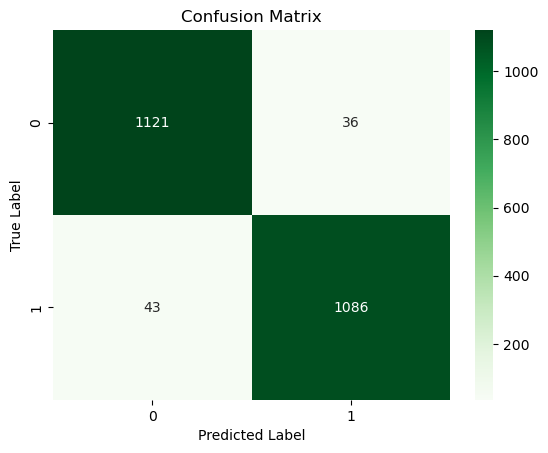

In [180]:
sns.heatmap(svm_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## XGBoost

In [182]:
params = {
    'n_estimators': 100,
    'max_depth': 6,       
    'learning_rate': 0.1,
    'subsample': 0.8,     
    'colsample_bytree': 0.8, 
    'min_child_weight': 1,    
    'gamma': 0,                
    'objective': 'binary:logistic'
}

In [183]:
xgb = XGBClassifier(**params)
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [184]:
xgb_predict = xgb.predict(X_test_scaled)

In [185]:
accuracy = accuracy_score(y_test,xgb_predict)
print("Accuracy:{}%".format(round(accuracy *100), 1))

Accuracy:95%


In [186]:
xgb_Accuracy_Score = accuracy_score(y_test,xgb_predict)
xgb_JaccardIndex = jaccard_score(y_test,xgb_predict)
xgb_F1_Score = f1_score(y_test,xgb_predict)
xgb_Log_Loss = log_loss(y_test,xgb_predict)

In [187]:
print(f"Accuracy: {xgb_Accuracy_Score}")
print(f"Jaccard Index: {xgb_JaccardIndex}")
print(f"F1 Score: {xgb_F1_Score}")
print(f"Log Loss: {xgb_Log_Loss}")

Accuracy: 0.9453193350831146
Jaccard Index: 0.8958333333333334
F1 Score: 0.945054945054945
Log Loss: 1.9708909333506757


In [188]:
xgb_conf_matrix = confusion_matrix(y_test,xgb_predict)
xgb_conf_matrix

array([[1086,   71],
       [  54, 1075]], dtype=int64)

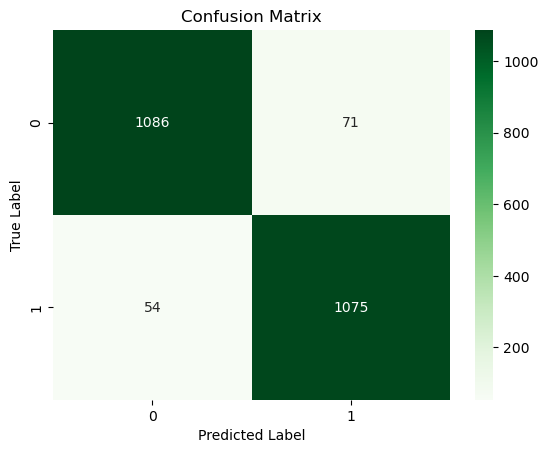

In [189]:
sns.heatmap(xgb_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Model Accurancy

In [191]:
accuracy_scores = {
    'Random Forest' : round(accuracy_score(y_test,rf_predict), 2),
    'SVM' : round(accuracy_score(y_test,svm_predict), 2),
    'XGBoost' : round(accuracy_score(y_test,xgb_predict), 2)
}

In [192]:
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy Score'])
accuracy_df

,Model,Accuracy Score
0,Random Forest,0.96
1,SVM,0.97
2,XGBoost,0.95


## Saving the Model

In [1]:
import pickle
from urllib.parse import urlparse

In [195]:
# #saving the best performing model

# filename = 'phishing_detection_XGBoost_model.sav'
# pickle.dump(rf, open(XGBoost, 'wb'))

In [196]:
with open('phishing_detection_XGBoost_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [197]:
!pip install gradio

In [1]:
import gradio as gr
import pickle
import joblib
import numpy as np
import pandas as pd
from urllib.parse import urlparse


with open("phishing_detection_XGBoost_model.pkl", "rb") as file:
    model = pickle.load(file)


scaler = joblib.load("scaler.pkl")  


def extract_features(url):
    parsed_url = urlparse(url)
    
    
    url_length = len(url)
    domain_length = len(parsed_url.netloc)
    num_dots = url.count('.')
    num_hyphens = url.count('-')
    num_at_symbols = url.count('@')
    num_slashes = parsed_url.path.count('/')
    https_flag = 1 if url.startswith("https") else 0  

    
    num_digits = sum(c.isdigit() for c in url)  # Count of numbers in URL
    num_special_chars = sum(not c.isalnum() for c in url)  # Special characters
    domain_token_count = len(parsed_url.netloc.split('.'))  # Subdomains count
    path_token_count = len(parsed_url.path.split('/'))  # Path depth
    query_length = len(parsed_url.query)  # Query length
    has_ip_address = 1 if any(c.isdigit() for c in parsed_url.netloc) else 0  # IP Address in domain?
    
    
    additional_features = [0] * (48 - 13)  

    
    features = [
        url_length, domain_length, num_dots, num_hyphens, num_at_symbols, num_slashes, https_flag,
        num_digits, num_special_chars, domain_token_count, path_token_count, query_length, has_ip_address
    ] + additional_features 

    return np.array(features).reshape(1, -1)



def predict_phishing(url):
    try:
        parsed_url = urlparse(url)
        if not parsed_url.scheme or not parsed_url.netloc:
            return "Invalid URL. Please enter a valid website address."
        
        features = extract_features(url)
        scaled_features = scaler.transform(features)
        prediction = model.predict(scaled_features)[0]
        result = "\U0001F534 Phishing Website" if prediction == 1 else "\U0001F7E2 Legitimate Website"
        return result
    except Exception as e:
        return f"An error occurred: {str(e)}"


iface = gr.Interface(
    fn=predict_phishing,
    inputs=gr.Textbox(label="Enter Website URL", placeholder="https://example.com"),
    outputs=gr.Label(label="Prediction"),
    title="Phishing Website Detection",
    description="Enter a website URL to check if it is a **Phishing** or **Legitimate** site using an XGBoost model.",
    theme="default"
)


iface.launch(share=True,debug=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

Using existing dataset file at: .gradio\flagged\dataset1.csv


c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\indra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: U

Keyboard interruption in main thread... closing server.
